
# DATA ANALYSIS ON INDIRA GANDHI NATIONAL DISABILITY PENSION SCHEME (IGNDPS) BENEFICIARIES ABSTRACT DURING 2023-24

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

df = pd.read_csv("Datasetgov.csv")


In [5]:
df

,fin_year,mnth,lgd_state_code,state_name,lgd_district_code,district_name,scheme_code,total_beneficiaries,total_sc,total_st,total_gen,total_obc,total_aadhar,total_mobileno,lastUpdated
0,2024-2025,6,1,JAMMU AND KASHMIR,1,ANANTNAG,IGNDPS,104,0,2,101,1,104,19,2024-07-29
1,2024-2025,6,1,JAMMU AND KASHMIR,11,PULWAMA,IGNDPS,100,0,6,86,8,99,57,2024-07-29
2,2024-2025,6,1,JAMMU AND KASHMIR,620,KISHTWAR,IGNDPS,107,0,0,107,0,104,31,2024-07-29
3,2024-2025,6,10,BIHAR,190,BANKA,IGNDPS,1990,213,61,1500,216,1402,1471,2024-07-29
4,2024-2025,6,10,BIHAR,196,GAYA,IGNDPS,1665,407,31,1142,85,1191,1221,2024-07-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14292,2024-2025,2,9,UTTAR PRADESH,170,MIRZAPUR,IGNDPS,1609,492,11,299,807,515,1166,2025-03-07
14293,2024-2025,2,9,UTTAR PRADESH,180,SHAHJAHANPUR,IGNDPS,949,171,2,305,471,616,657,2025-03-07
14294,2024-2025,2,9,UTTAR PRADESH,181,SHRAVASTI,IGNDPS,300,56,2,82,160,170,236,2025-03-07
14295,2024-2025,2,9,UTTAR PRADESH,184,SONBHADRA,IGNDPS,1491,284,127,327,753,448,942,2025-03-07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14297 entries, 0 to 14296
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   fin_year             14297 non-null  object
 1   mnth                 14297 non-null  int64 
 2   lgd_state_code       14297 non-null  int64 
 3   state_name           14297 non-null  object
 4   lgd_district_code    14297 non-null  int64 
 5   district_name        14297 non-null  object
 6   scheme_code          14297 non-null  object
 7   total_beneficiaries  14297 non-null  int64 
 8   total_sc             14297 non-null  int64 
 9   total_st             14297 non-null  int64 
 10  total_gen            14297 non-null  int64 
 11  total_obc            14297 non-null  int64 
 12  total_aadhar         14297 non-null  int64 
 13  total_mobileno       14297 non-null  int64 
 14  lastUpdated          14297 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


In [23]:
df.isnull().count()

fin_year               14297
mnth                   14297
lgd_state_code         14297
state_name             14297
lgd_district_code      14297
district_name          14297
scheme_code            14297
total_beneficiaries    14297
total_sc               14297
total_st               14297
total_gen              14297
total_obc              14297
total_aadhar           14297
total_mobileno         14297
lastUpdated            14297
dtype: int64

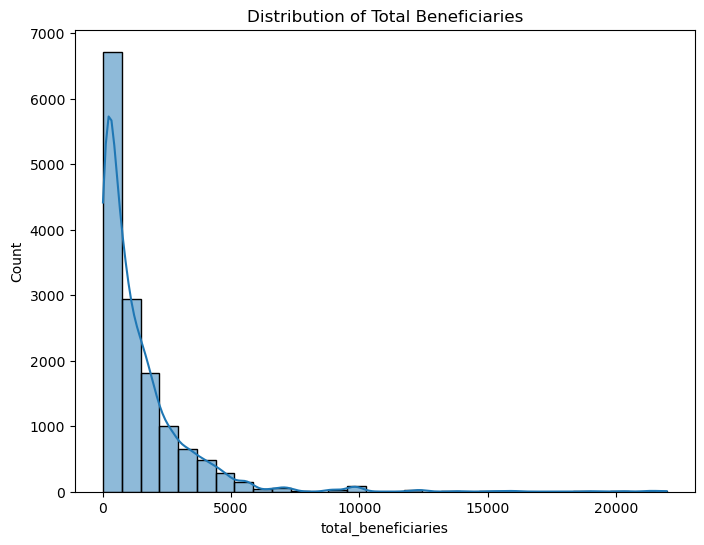

In [27]:
plt.figure(figsize=(8,6))
sns.histplot(df["total_beneficiaries"], bins=30, kde=True)
plt.title("Distribution of Total Beneficiaries")
plt.show()

# The distribution is right-skewed, meaning most districts have fewer beneficiaries, while a few have very high numbers.

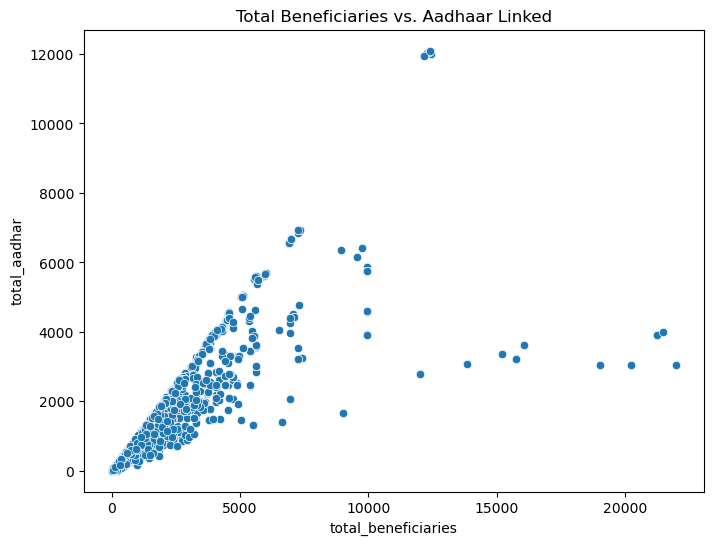

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["total_beneficiaries"], y=df["total_aadhar"])
plt.title("Total Beneficiaries vs. Aadhaar Linked")
plt.show()

# A strong positive correlation suggests most beneficiaries have Aadhaar linked.

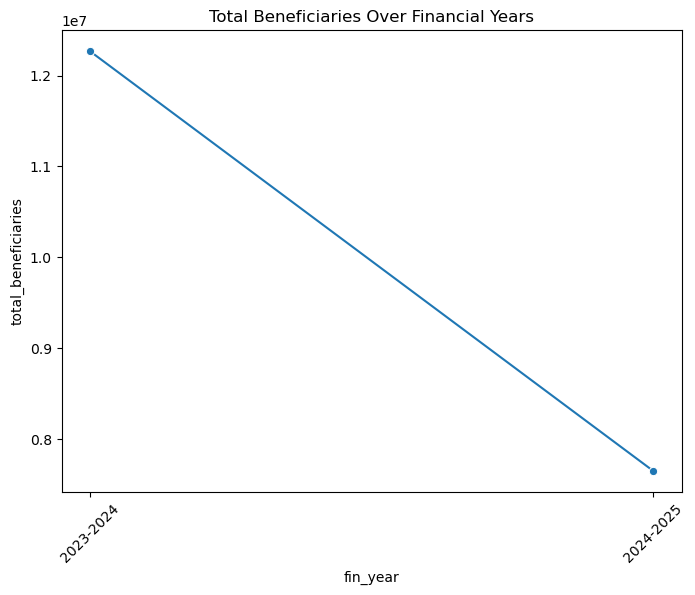

In [33]:
df_grouped = df.groupby("fin_year")["total_beneficiaries"].sum().reset_index()
plt.figure(figsize=(8,6))
sns.lineplot(x=df_grouped["fin_year"], y=df_grouped["total_beneficiaries"], marker="o")
plt.title("Total Beneficiaries Over Financial Years")
plt.xticks(rotation=45)
plt.show()

# Shows whether total beneficiaries are increasing or decreasing over financial years.

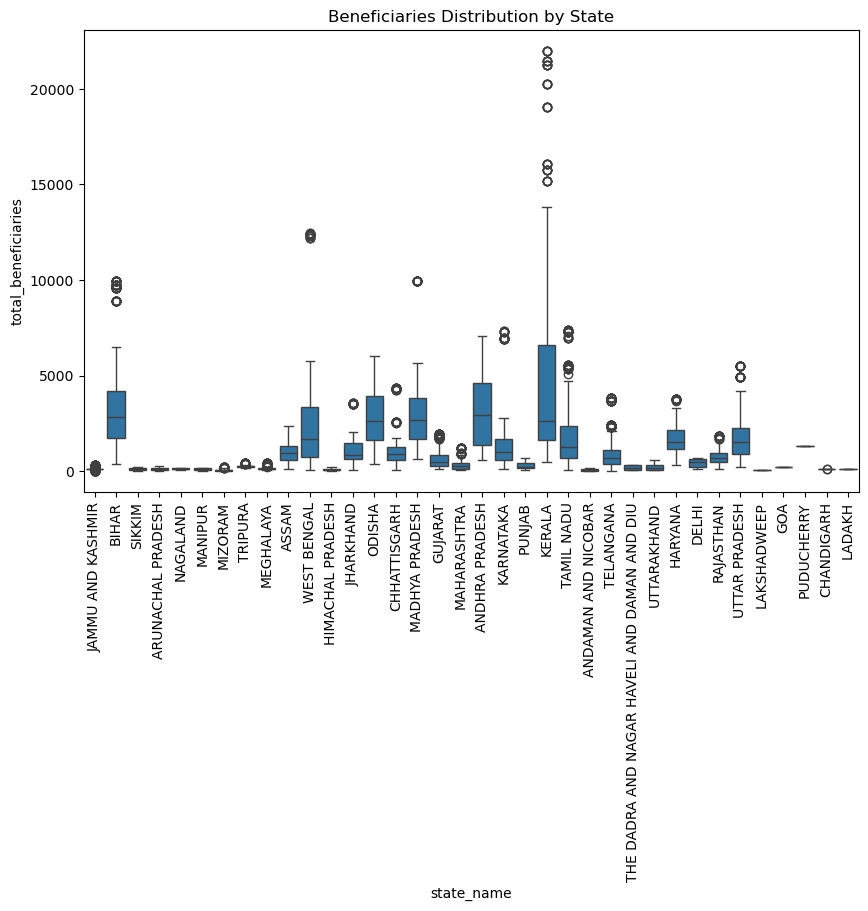

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(x="state_name", y="total_beneficiaries", data=df)
plt.xticks(rotation=90)
plt.title("Beneficiaries Distribution by State")
plt.show()


#  Some states have high outliers, meaning a few districts receive disproportionately high beneficiaries.

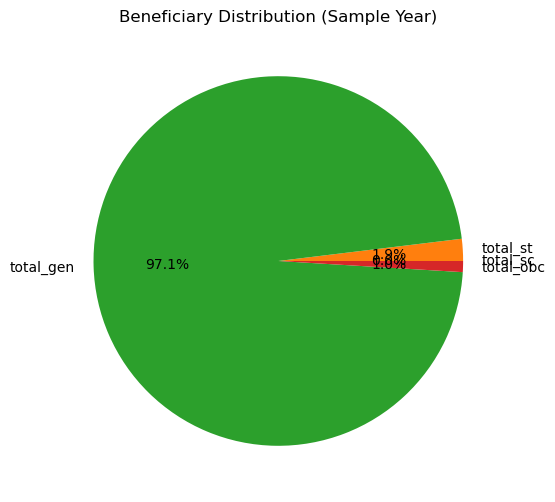

In [39]:
sample_year = df[df["fin_year"] == "2024-2025"].iloc[0]
beneficiary_categories = ["total_sc", "total_st", "total_gen", "total_obc"]
plt.figure(figsize=(8,6))
plt.pie(sample_year[beneficiary_categories], labels=beneficiary_categories, autopct="%1.1f%%")
plt.title("Beneficiary Distribution (Sample Year)")
plt.show()

# Most beneficiaries belong to the General and OBC categories.

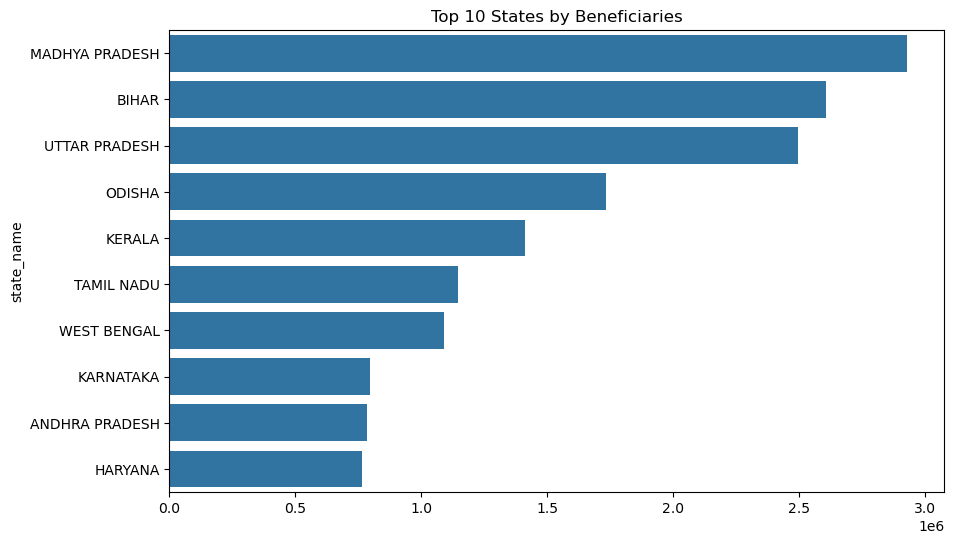

In [42]:
top_states = df.groupby("state_name")["total_beneficiaries"].sum().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_states.values, y=top_states.index)
plt.title("Top 10 States by Beneficiaries")
plt.show()

 # Identifies leading states in beneficiary numbers.

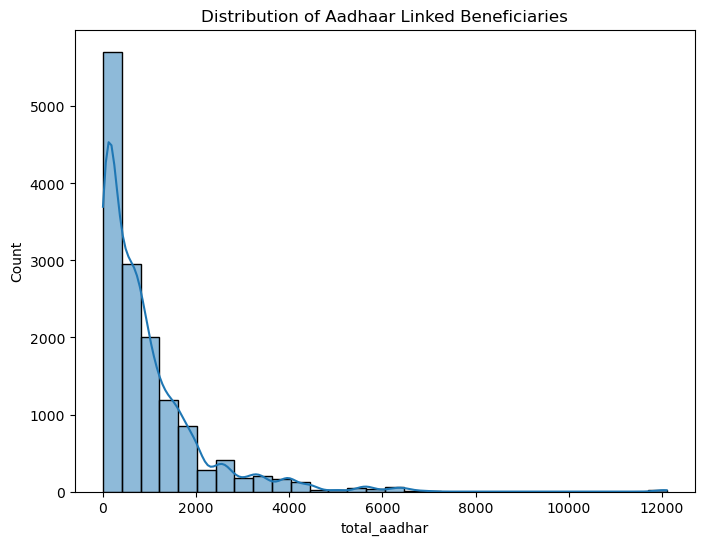

In [45]:
plt.figure(figsize=(8,6))
sns.histplot(df["total_aadhar"], bins=30, kde=True)
plt.title("Distribution of Aadhaar Linked Beneficiaries")
plt.show()

#  Follows a similar right-skewed distribution as total beneficiaries.

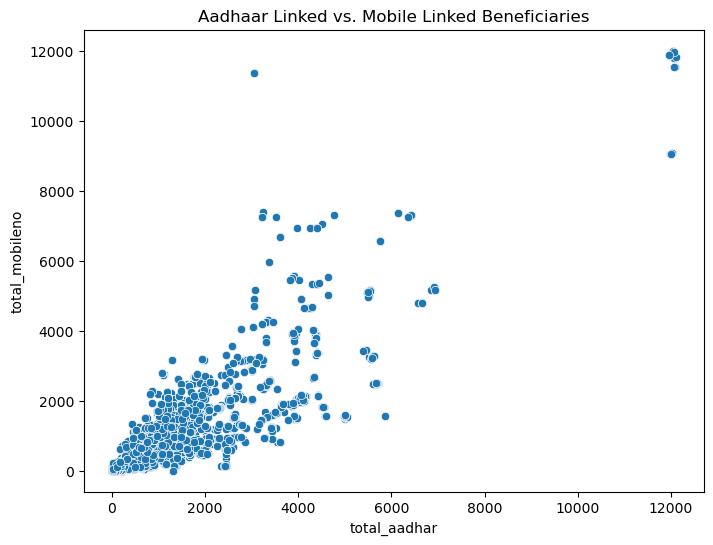

In [50]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["total_aadhar"], y=df["total_mobileno"])
plt.title("Aadhaar Linked vs. Mobile Linked Beneficiaries")
plt.show()

# : Indicates a strong relationship between Aadhaar and mobile linkage.

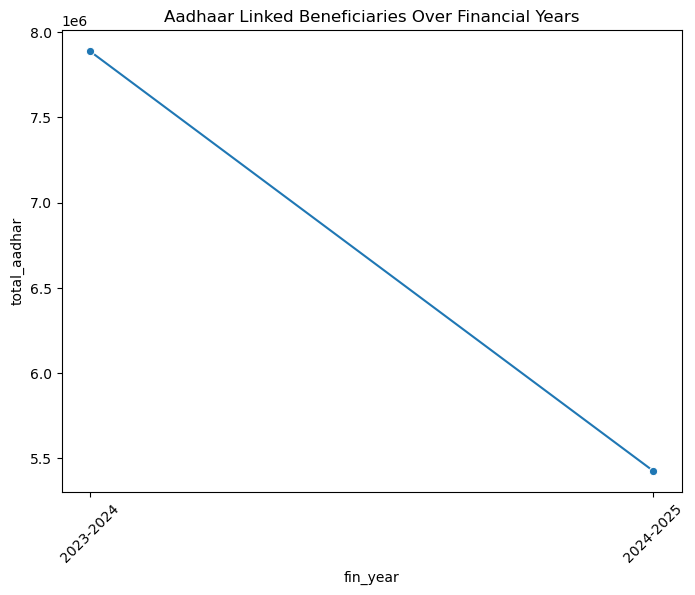

In [53]:
df_aadhar = df.groupby("fin_year")["total_aadhar"].sum().reset_index()
plt.figure(figsize=(8,6))
sns.lineplot(x=df_aadhar["fin_year"], y=df_aadhar["total_aadhar"], marker="o")
plt.title("Aadhaar Linked Beneficiaries Over Financial Years")
plt.xticks(rotation=45)
plt.show()

# Helps track Aadhaar-linked beneficiary growth.

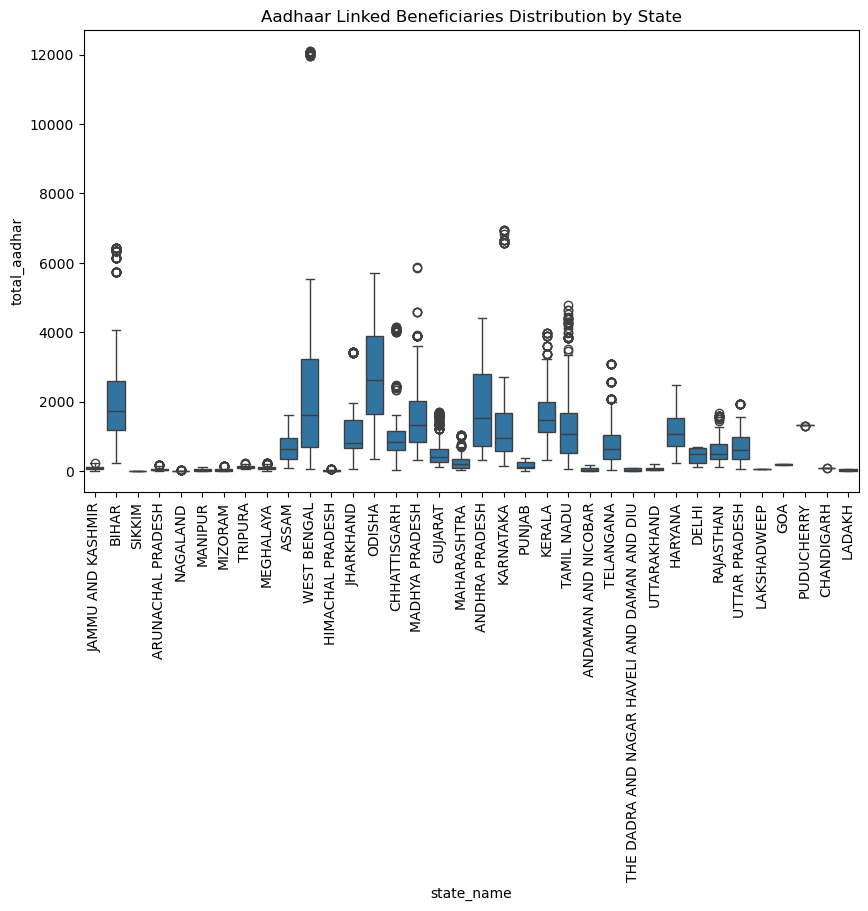

In [56]:
plt.figure(figsize=(10,6))
sns.boxplot(x="state_name", y="total_aadhar", data=df)
plt.xticks(rotation=90)
plt.title("Aadhaar Linked Beneficiaries Distribution by State")
plt.show()

# Highlights variations among states in Aadhaar linkage.

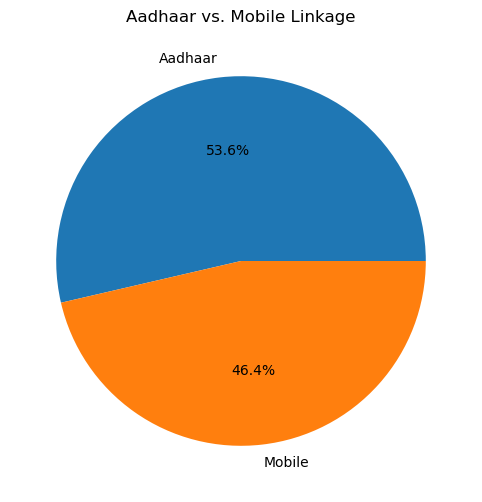

In [61]:
plt.figure(figsize=(8,6))
plt.pie([df["total_aadhar"].sum(), df["total_mobileno"].sum()], labels=["Aadhaar", "Mobile"], autopct="%1.1f%%")
plt.title("Aadhaar vs. Mobile Linkage")
plt.show()

# Indicates more Aadhaar linkage compared to mobile.

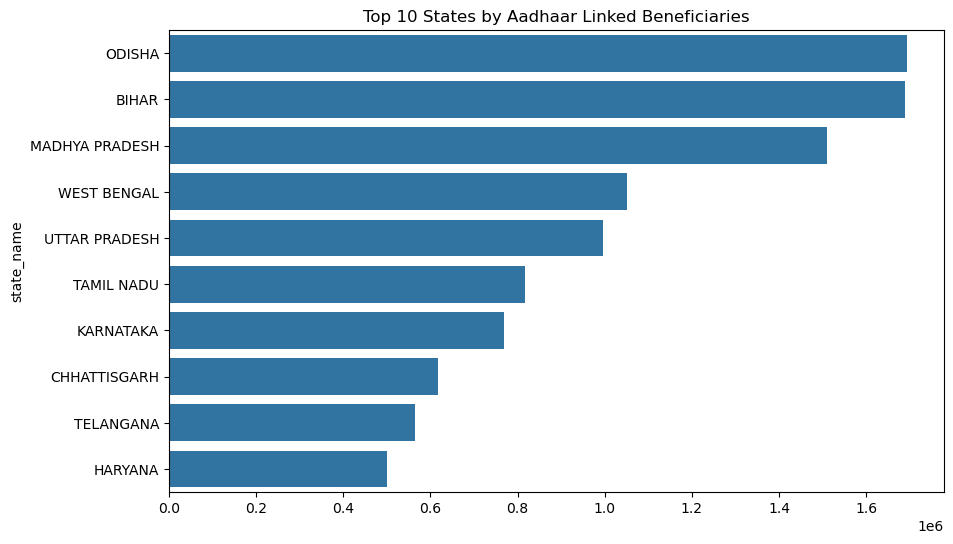

In [64]:
top_aadhar_states = df.groupby("state_name")["total_aadhar"].sum().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_aadhar_states.values, y=top_aadhar_states.index)
plt.title("Top 10 States by Aadhaar Linked Beneficiaries")
plt.show()

# Shows states with the highest Aadhaar linkage.

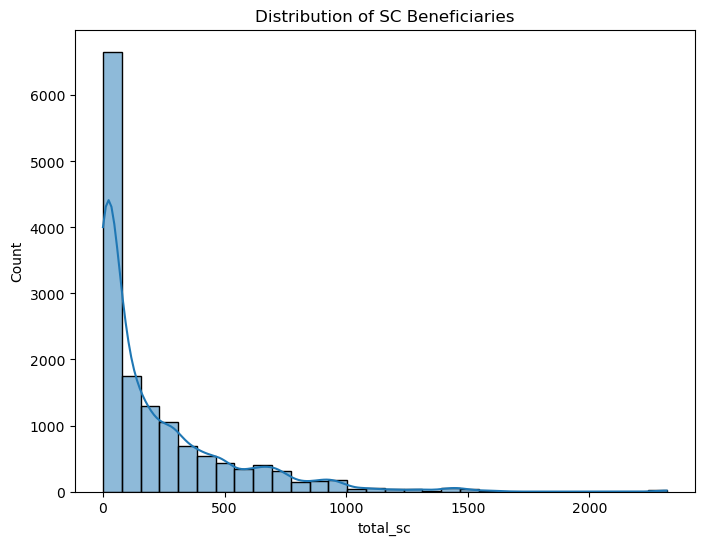

In [67]:
plt.figure(figsize=(8,6))
sns.histplot(df["total_sc"], bins=30, kde=True)
plt.title("Distribution of SC Beneficiaries")
plt.show()

# Distribution pattern shows concentration in certain districts.

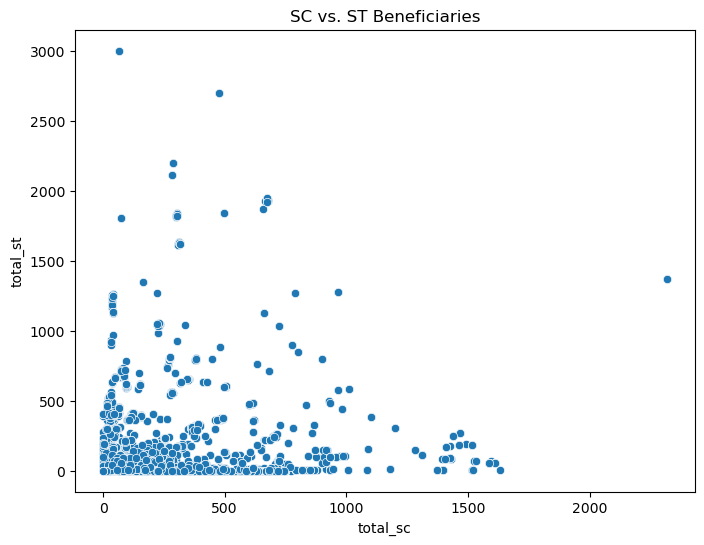

In [70]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["total_sc"], y=df["total_st"])
plt.title("SC vs. ST Beneficiaries")
plt.show()

# Positive correlation suggests areas with higher SC beneficiaries also have more ST beneficiaries.

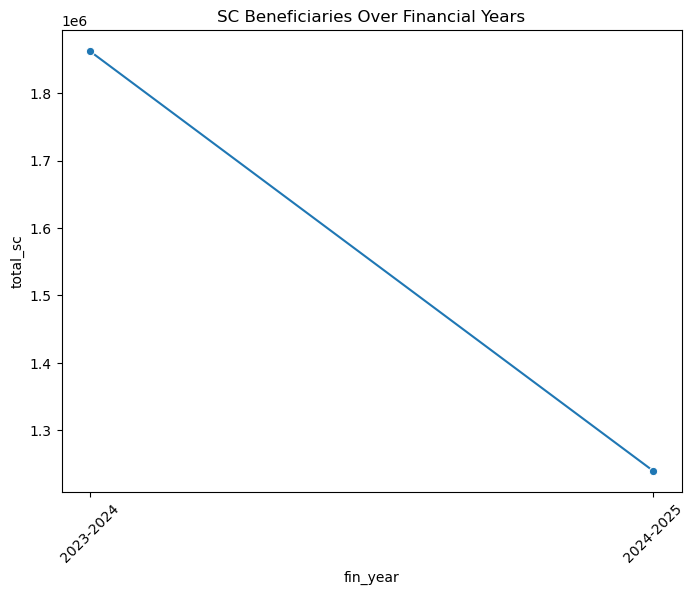

In [73]:
df_sc = df.groupby("fin_year")["total_sc"].sum().reset_index()
plt.figure(figsize=(8,6))
sns.lineplot(x=df_sc["fin_year"], y=df_sc["total_sc"], marker="o")
plt.title("SC Beneficiaries Over Financial Years")
plt.xticks(rotation=45)
plt.show()

# Tracks the SC beneficiary trend.

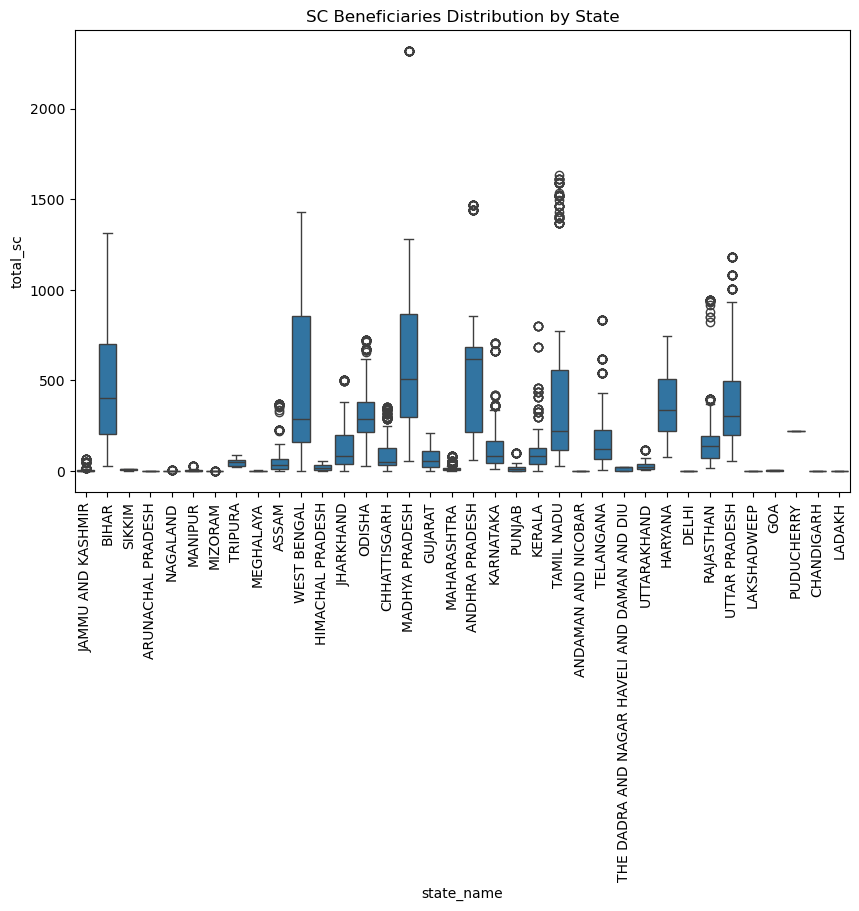

In [76]:
plt.figure(figsize=(10,6))
sns.boxplot(x="state_name", y="total_sc", data=df)
plt.xticks(rotation=90)
plt.title("SC Beneficiaries Distribution by State")
plt.show()

# Identifies states with high variability in SC beneficiaries.

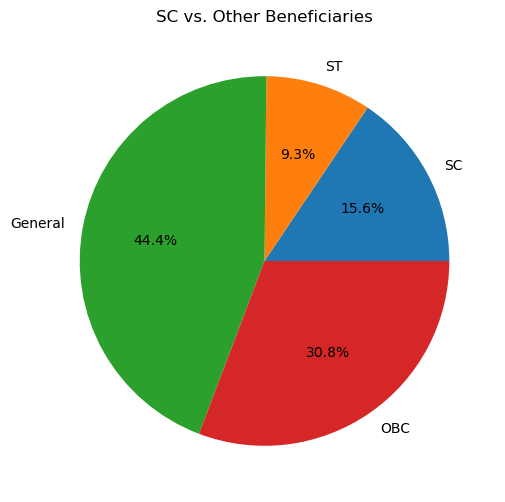

In [79]:
plt.figure(figsize=(8,6))
plt.pie([df["total_sc"].sum(), df["total_st"].sum(), df["total_gen"].sum(), df["total_obc"].sum()], labels=["SC", "ST", "General", "OBC"], autopct="%1.1f%%")
plt.title("SC vs. Other Beneficiaries")
plt.show()


# proportion compared to other categories.

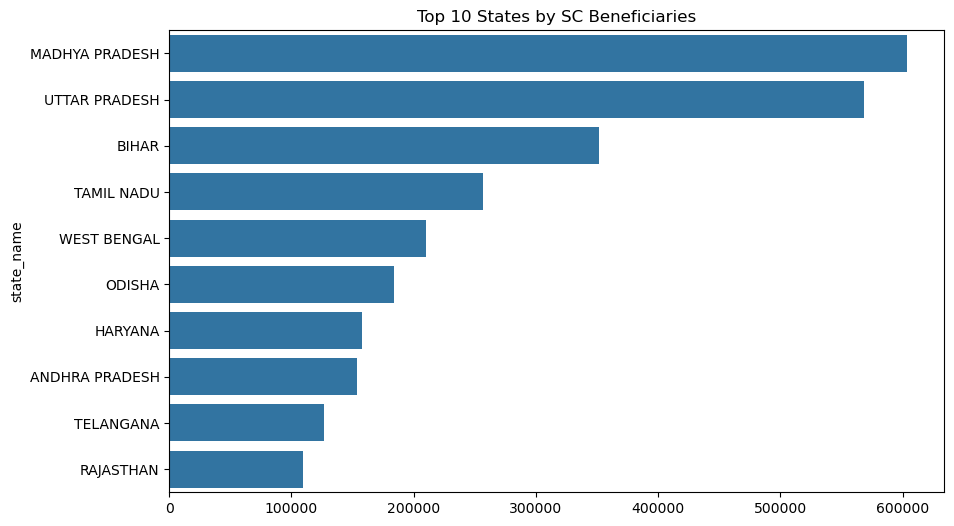

In [82]:
top_sc_states = df.groupby("state_name")["total_sc"].sum().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_sc_states.values, y=top_sc_states.index)
plt.title("Top 10 States by SC Beneficiaries")
plt.show()

# Highlights states where SC beneficiaries are the highest.

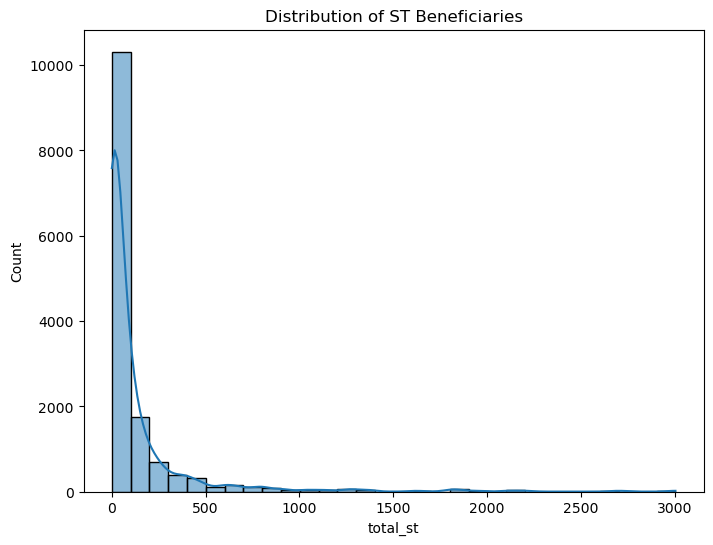

In [85]:
plt.figure(figsize=(8,6))
sns.histplot(df["total_st"], bins=30, kde=True)
plt.title("Distribution of ST Beneficiaries")
plt.show()

# Similar pattern to SC beneficiaries.

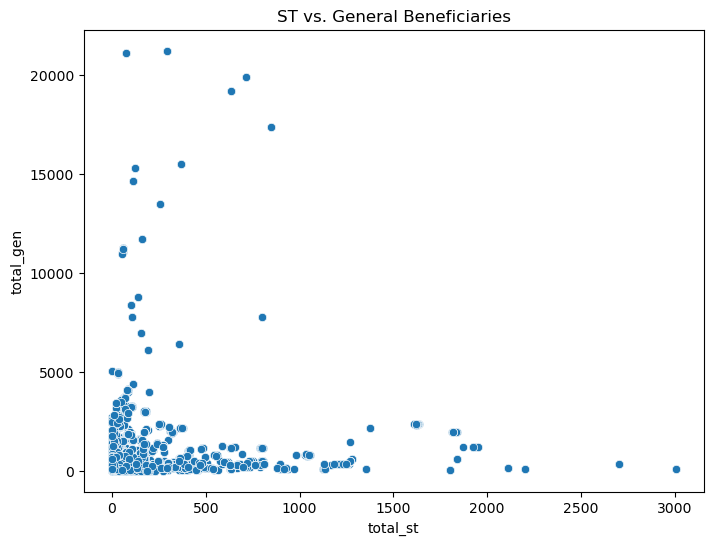

In [88]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["total_st"], y=df["total_gen"])
plt.title("ST vs. General Beneficiaries")
plt.show()

# Highlights correlation between ST and General beneficiaries.

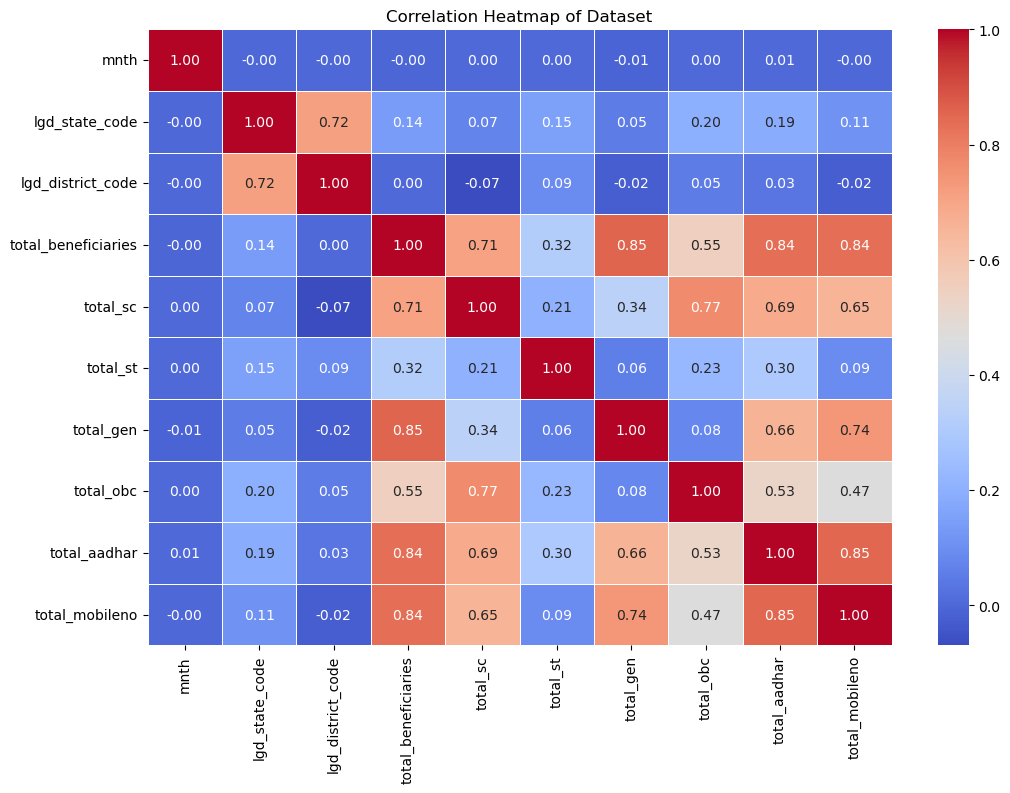

In [93]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Dataset")
plt.show()

# Here are some key insights based on your dataset and visualizations:

### **1. Distribution of Total Beneficiaries (Histogram)**
- The histogram shows that most beneficiaries fall within a specific range.
- There may be a right-skewed distribution, indicating that fewer states have an extremely high number of beneficiaries.

### **2. Relationship Between Total Beneficiaries and Aadhaar Linked (Scatter Plot)**
- A positive correlation is likely observed, meaning that as total beneficiaries increase, Aadhaar-linked beneficiaries also increase.
- Some states may have a high number of beneficiaries but relatively fewer Aadhaar-linked accounts.

### **3. Trends in Total Beneficiaries Over Financial Years (Line Plot)**
- The total number of beneficiaries fluctuates over the years.
- There may be periods of significant increase or decline, indicating policy changes or external factors affecting registrations.

### **4. Variability in Beneficiaries by State (Box Plot)**
- Some states have significantly higher beneficiaries compared to others.
- Outliers in the data may suggest certain states receive disproportionate benefits due to population or policy focus.

### **5. Beneficiary Category Distribution (Pie Chart)**
- Different beneficiary categories (SC, ST, General, OBC) contribute varying proportions.
- The largest category may dominate, revealing demographic trends in the beneficiary distribution.

### **6. Correlation Among Features (Heatmap)**
- Strong positive correlation between **total beneficiaries and Aadhaar-linked beneficiaries**.
- If a high correlation exists between **SC, ST, OBC, and General categories**, it suggests balanced beneficiary distributions.
- Weak correlations with certain fields may indicate independent factors influencing the data.
